# Importing libraries and dataset

In [2]:
import numpy as np
import pandas as pd 
import seaborn as sb
import matplotlib.pyplot as plt

In [121]:
data=pd.read_csv("Desktop/data/StudentsPerformance.csv")

In [4]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


# Some inforamtion about dataset

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 43.0+ KB


In [6]:
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [7]:
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


# There is a relation between grades :)
*those people who have good grade in one subject are also good in other subjects*

<AxesSubplot:>

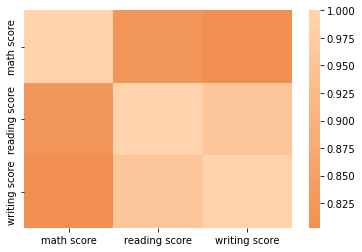

In [8]:
sb.heatmap(data.corr(),center=0)

**How many categories are in non numeric columns**

In [13]:
data["parental level of education"].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

In [75]:
data["lunch"].value_counts()

standard        645
free/reduced    355
Name: lunch, dtype: int64

In [76]:
data["test preparation course"].value_counts()

none         642
completed    358
Name: test preparation course, dtype: int64

# Preprocessing 
I replaced binary ones with one and zero and non binary ones manually

In [122]:
frame=pd.get_dummies(data["gender"],drop_first=True)

In [123]:
frame1=pd.get_dummies(data["test preparation course"],drop_first=True)

In [125]:
frame2=pd.get_dummies(data["lunch"],drop_first=True)

In [126]:
frame2=frame2.rename(columns={"standard":"Lunch"})

In [127]:
frame1=frame1.rename(columns={"none":"preparation course"})

In [128]:
frame_Main=pd.concat([frame,frame1,frame2],axis=1)

In [129]:
data=pd.concat([data,frame_Main],axis=1)

In [133]:
data=data.drop(["gender","test preparation course","lunch"],axis=1)

In [137]:
race=[]
for x in data["race/ethnicity"]:
    if x=="group A":
        race.append(1)
    elif x=="group B":
        race.append(2)
    elif x=="group C":
        race.append(3)
    else:
        race.append(4)

In [139]:
data["race/ethnicity"]=race

In [142]:
race=[]
for x in data["parental level of education"]:
    if x=="some college":
        race.append(1)
    elif x=="associate's degree":
        race.append(2)
    elif x=="high school":
        race.append(3)
    elif x=="some high school":
        race.append(4)
    elif x=="bachelor's degree":
        race.append(5)
    else:
        race.append(6)

In [143]:
data["parental level of education"]=race

# Who did act better male or female

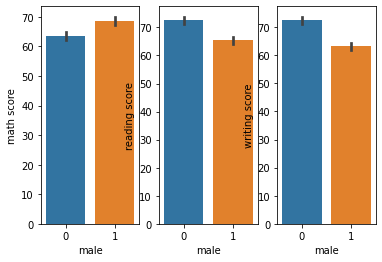

In [146]:
plt.subplot(1,3,1)
sb.barplot(data=data,x="male",y="math score")
plt.subplot(1,3,2)
sb.barplot(data=data,x="male",y="reading score")
plt.subplot(1,3,3)
sb.barplot(data=data,x="male",y="writing score")
plt.show()

# Did preperation courses actually usefull?

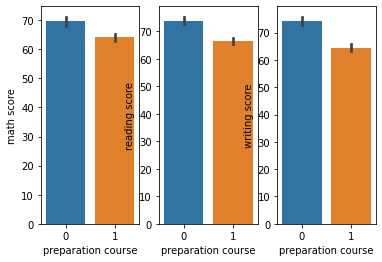

In [147]:
plt.subplot(1,3,1)
sb.barplot(data=data,x="preparation course",y="math score")
plt.subplot(1,3,2)
sb.barplot(data=data,x="preparation course",y="reading score")
plt.subplot(1,3,3)
sb.barplot(data=data,x="preparation course",y="writing score")
plt.show()

# Do those who had lunch acted better?

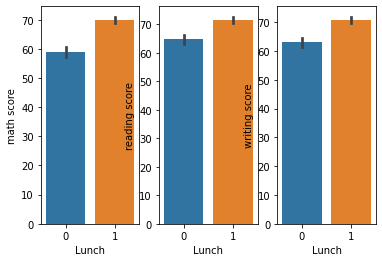

In [148]:
plt.subplot(1,3,1)
sb.barplot(data=data,x="Lunch",y="math score")
plt.subplot(1,3,2)
sb.barplot(data=data,x="Lunch",y="reading score")
plt.subplot(1,3,3)
sb.barplot(data=data,x="Lunch",y="writing score")
plt.show()

# Is population of male who had lunch greater than females?

<AxesSubplot:xlabel='male', ylabel='Lunch'>

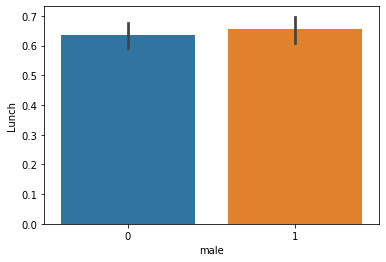

In [150]:
sb.barplot(data=data,x="male",y="Lunch")

# What is the avrage score of male and female in each subject

In [154]:
pd.pivot_table(data=data,index=["male"],aggfunc={"reading score":np.mean,"writing score":np.mean,"math score":np.mean})

,math score,reading score,writing score
male,,,
0,63.633205,72.608108,72.467181
1,68.728216,65.473029,63.311203


# Whic category of race or ethnicity 

<AxesSubplot:xlabel='race/ethnicity', ylabel='count'>

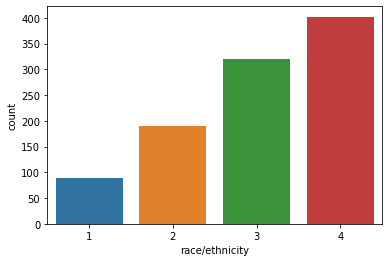

In [155]:
sb.countplot(data=data,x="race/ethnicity")